# Iterators

In [2]:
import pandas as pd
#~ iter() Turns iterable (lists,strings, etc.) into an iterator
#& iterators has a next() that produces the next value
word = 'Toni Castanares'
it = iter(word)
print(next(it))

#& We can also iterate all through the elements using the * (star operator)
it_1 = iter(word) #* There are no more values to be iterated if the star operator is called 
print(*it_1)


#~ enumerate() -  adds a counter to an iterable and returns it in the form of an enumerating object. 
#~ This enumerated object can then be used directly for loops or converted into a list of tuples 
#~ using the list() function. 
names = ['toni','frances','niel']
e = enumerate(names)
e_list = list(e)
print(e_list)
#& Like a dictionary, it has a 'value' but also an 'index' instead of key
for index, value in e_list:
    match index:
        case 0:
            print('The {}st person is {}'.format(index+1,value.title()))
        case 1:
            print('The {}nd person is {}'.format(index+1,value.title()))
        case 2:
            print('The {}rd person is {}'.format(index+1,value.title()))
        case default:
            print('The {}th person is {}'.format(index+1,value.title()))
            
#~ zip() - accepts an arbitrary number of iterables and returns an iterator of tuples
names_1 = ['danice','niel','frances']
z=zip(names,names_1)
print(list(z))
print(*zip(names,names_1))

for z1, z2 in zip(names,names_1):
    print('{} is for {}'.format(z1.title(),z2.title()))
    

#~ Iterators loads data in chunks to save memory
bmi = pd.read_csv('Datasets/bmi.csv', chunksize=1000)
result = 0
for chunk in bmi:
    result+= sum(chunk['Weight'])
print(result) #* shows the toal chunk memory of the csv

T
T o n i   C a s t a n a r e s
[(0, 'toni'), (1, 'frances'), (2, 'niel')]
The 1st person is Toni
The 2nd person is Frances
The 3rd person is Niel
[('toni', 'danice'), ('frances', 'niel'), ('niel', 'frances')]
('toni', 'danice') ('frances', 'niel') ('niel', 'frances')
Toni is for Danice
Frances is for Niel
Niel is for Frances
53000


# Advanced Comprehensions

In [3]:
print(['Fizz' if i%3 ==0 else i for i in range(1,101)])
dictionary = {key:str(key+10) for key in range(0,10)}
print(dictionary)


#~ Generators - Created when comprehension is applied to parentheses
#& Memory efficent
numbers = (num for num in range(1,101) if num%2==0)
print(next(numbers))

[1, 2, 'Fizz', 4, 5, 'Fizz', 7, 8, 'Fizz', 10, 11, 'Fizz', 13, 14, 'Fizz', 16, 17, 'Fizz', 19, 20, 'Fizz', 22, 23, 'Fizz', 25, 26, 'Fizz', 28, 29, 'Fizz', 31, 32, 'Fizz', 34, 35, 'Fizz', 37, 38, 'Fizz', 40, 41, 'Fizz', 43, 44, 'Fizz', 46, 47, 'Fizz', 49, 50, 'Fizz', 52, 53, 'Fizz', 55, 56, 'Fizz', 58, 59, 'Fizz', 61, 62, 'Fizz', 64, 65, 'Fizz', 67, 68, 'Fizz', 70, 71, 'Fizz', 73, 74, 'Fizz', 76, 77, 'Fizz', 79, 80, 'Fizz', 82, 83, 'Fizz', 85, 86, 'Fizz', 88, 89, 'Fizz', 91, 92, 'Fizz', 94, 95, 'Fizz', 97, 98, 'Fizz', 100]
{0: '10', 1: '11', 2: '12', 3: '13', 4: '14', 5: '15', 6: '16', 7: '17', 8: '18', 9: '19'}
2


# Exploratory Data Analysis

In [4]:
import pandas as pd
bmi = pd.read_csv('Datasets/bmi.csv')
#~ select_dtypes() will view only columns of the data type stored in it
display(bmi.select_dtypes('number').head())
display(bmi.head())
display(bmi.select_dtypes('object').head())

#~ agg() can be applied to separate columns
display(bmi.agg({'Weight':['mean','std'],'Height':['max','min']}))

,Height,Weight,Index
0,174,96,4
1,189,87,2
2,185,110,4
3,195,104,3
4,149,61,3


,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


,Gender
0,Male
1,Male
2,Female
3,Female
4,Male


,Weight,Height
mean,106.000000,NaN
std,32.382607,NaN
max,NaN,199.0
min,NaN,140.0


## Categorical Data

In [5]:

#~ contains() - searches column for specific string
display(bmi['Gender'].str.contains('Male'))
display(bmi['Gender'].str.contains('Male|Female')) #* |-OR operator

#~ Creating categorical column
#& bmi['Rating'] = np.select(conditions,job_categories, default='Other')
#* job_categoeies new column based on conditions established from contains().

0       True
1       True
2      False
3      False
4       True
       ...  
495    False
496    False
497    False
498     True
499     True
Name: Gender, Length: 500, dtype: bool

0      True
1      True
2      True
3      True
4      True
       ... 
495    True
496    True
497    True
498    True
499    True
Name: Gender, Length: 500, dtype: bool

In [6]:

#~ Convert strigns to numbers
a = pd.Series('3,4,5,6,7,8')
b=a.str.replace(',','') #* str always sepcific the data type. Each iterable is treated different.
print(b)
print(b.astype('int'))

#~ Applyiung summary statistics using trnasform()
## Mean Price by Destination
#& planes["price_destination_mean"] = planes.groupby("Destination")["Price"].transform(lambda x: x.mean())
#& print(planes[["Destination","price_destination_mean"]].value_counts())

0    345678
dtype: object
0    345678
dtype: int64


## Relationships in Data

,Height,Weight,Index
Height,1.000000,0.000446,-0.422223
Weight,0.000446,1.000000,0.804569
Index,-0.422223,0.804569,1.000000


<Axes: xlabel='Height', ylabel='Density'>

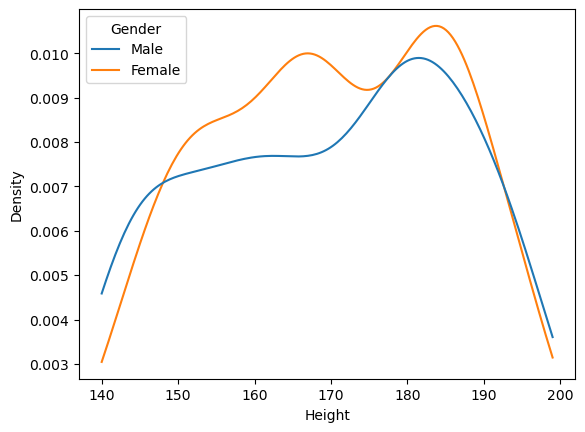

In [13]:
import seaborn as sns
# Import divorce.csv, parsing the appropriate columns as dates in the import
#& divorce = pd.read_csv('divorce.csv',parse_dates = ['divorce_date','dob_man','dob_woman','marriage_date'])
#& print(divorce.dtypes)
#* parses the list columns into date.

#~ Using the to_datetime() method
#& divorce["marriage_date"] = pd.to_datetime(divorce["marriage_date"])

#~ corr() - shows correlation coeffs for each columns
display(bmi.copy().drop(columns=['Gender']).corr())
#sns.scatterplot(data=bmi,x='Weight',y='Height') #* shows no correlation (do not run)

#~ Kernel Density Estimate (KDE) plots - Visualizes distibutions like histplot but easier to interpret
sns.kdeplot(data=bmi, x='Height',hue='Gender',cut=0)

## Actionable Exploratory Analysis

In [ ]:

#~ Cross tabulation
#& print(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"],\ 
#&            values=salaries["Salary_USD"], aggfunc="mean"))


#~ pd.cut() - Used to assign data to a specific group. Below is a good example of grouping data
#~ Based on one column
#* Crimes committed vs different ages
vict_age_group = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]
bins = [0, 17, 25, 34, 44, 54, 64, float('inf')]
crimes['Vict_age_group']=pd.cut(crimes['Vict Age'],labels=vict_age_group,bins=bins)
display(crimes.head( ))

# Importing Data in Python

## Flat Files

In [14]:
import pandas as pd
import numpy as np
file = open('/home/toni/Desktop/Programming_Projects/Data Science Projects/Datasets/test.txt', mode='r')
text= file.read()
print(text)
file.close() #* Always close the file after reading

#~ Flat files - Tab les without relatioinships. Examples are xls and csvs.
#& csv - row entries are separated by commas
# data = np.loadtxt('/home/toni/Desktop/Programming_Projects/Data Science Projects/Datasets/test.txt',
#                   delimiter='\t') #! Don't run


If Pirus and Crips all got along
They'd probably gun me down by the end of this song
Seem like the whole city go against me
Every time I'm in the street I hear
"Yawk! Yawk! Yawk! Yawk!"
"Man down
Where you from, nigga?"
"Fuck who you know, where you from, my nigga?"
"Where your grandma stay, huh, my nigga?"
"This m.A.A.d city I run, my nigga"
Brace yourself, I'll take you on a trip down memory lane
This is not a rap on how I'm slingin crack or move cocaine
This is cul-de-sac and plenty Cognac and major pain
Not the drill sergeant, but the stress that weighing on your brain
It was me, L Boog, and Yan Yan, YG Lucky ride down Rosecrans
It got ugly, waving your hand out the window, check yo self
Uh, Warriors and Conans
Hope euphoria can slow dance with society
The driver seat the first one to get killed
Seen a light-skinned nigga with his brains blown out
At the same burger stand where-, hang out
Now this is not a tape recording saying that he did it
But ever since that day, I was lookin' 

## Importing Other File Types

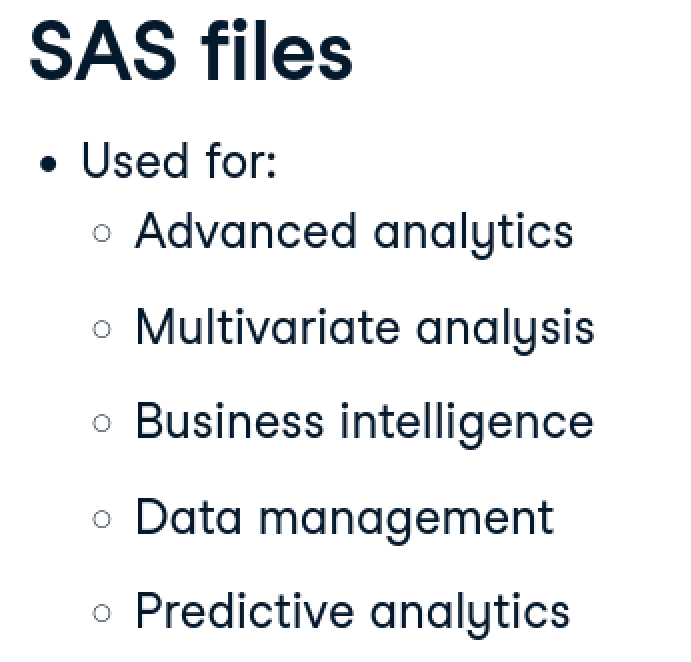

In [4]:
import pandas as pd
#~Excel
# df1=pd.read_excel('name of excel')

#~ Importing SAS/Stata.  
#!WARNING: Do not run snippet. For demonstration only.
# from sas7bdat import SAS7BDAT
# with SAS7BDAT('urbanpop.sas7bdat') as file:
#     df_sas = file.to_data_frame()
#* Executable
df3 = pd.read_stata('/home/toni/Desktop/Programming_Projects/Data Science Projects/Associate_Data_Scientist/Datasets/co3.dta')
display(df3.head())

#~ HDF5: Hierarchial Data Format v5
#~ Standard for storing large quantities of data
#! DO NOT RUN
import h5py
data=h5py.File(filename, 'r') #* r is to read
print(type(data)) #*class h5py.hl type. It is however, just a dictionary.

#~ MATLAB
# Import package
import scipy.io
# Load MATLAB file: mat
mat = scipy.loadmat('albeck_gene_expression.mat')
# Print the datatype type of mat
print(type(mat)) #* dxcict

    

,y,s,a,b
0,7,1,1,1
1,14,1,2,2
2,12,1,3,3
3,3,2,1,1
4,5,2,3,2


## Working with relational databases in Python

In [ ]:

#~ Database engine
#! DO NOT RUN
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')
# Open engine connection: con
con = engine.connect()
# Perform query: rs
rs = con.execute('SELECT * FROM Album')
# Save results of the query to DataFrame: df
df = pd.DataFrame(rs.fetchall())
# Close connection
con.close()
# Print head of DataFrame df
df.columns = rs.keys() #* Table names
print(df.head())

